In [1]:
import pysal as ps
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Regular Lattice Weights 

In [2]:
w = ps.lat2W()

In [3]:
w.asymmetries

[]

In [5]:
w.n

25

In [6]:
w.histogram

[(2, 4), (3, 12), (4, 9)]

In [7]:
w.neighbors

{0: [5, 1],
 1: [0, 6, 2],
 2: [1, 7, 3],
 3: [2, 8, 4],
 4: [3, 9],
 5: [0, 10, 6],
 6: [1, 5, 11, 7],
 7: [2, 6, 12, 8],
 8: [3, 7, 13, 9],
 9: [4, 8, 14],
 10: [5, 15, 11],
 11: [6, 10, 16, 12],
 12: [7, 11, 17, 13],
 13: [8, 12, 18, 14],
 14: [9, 13, 19],
 15: [10, 20, 16],
 16: [11, 15, 21, 17],
 17: [12, 16, 22, 18],
 18: [13, 17, 23, 19],
 19: [14, 18, 24],
 20: [15, 21],
 21: [16, 20, 22],
 22: [17, 21, 23],
 23: [18, 22, 24],
 24: [19, 23]}

In [8]:
w.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0],
 5: [1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0],
 20: [1.0, 1.0],
 21: [1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0],
 24: [1.0, 1.0]}

$s_0 = \sum_i \sum_j w_{i,j}$

In [9]:
w.s0

80.0

In [10]:
w.histogram

[(2, 4), (3, 12), (4, 9)]

In [11]:
np.sum( [ c[0]*c[1] for c in w.histogram ] )

80

In [12]:
w.pct_nonzero

0.128

$pctnonzero = s_0 / n^2$

In [13]:
w.s0 / w.n**2

0.128

## Queen Contiguity

In [14]:
wq = ps.lat2W(rook=False)

In [15]:
wq.s0

144.0

In [16]:
wq.histogram

[(3, 4), (4, 0), (5, 12), (6, 0), (7, 0), (8, 9)]

In [17]:
np.sum( [ c[0] * c[1] for c in wq.histogram ] )

144

In [18]:
wq.pct_nonzero

0.2304

In [19]:
144. / wq.n**2

0.2304

## Bishop

In [20]:
wb = ps.w_difference(wq,w, constrained = False)

In [21]:
wb.n

25

In [22]:
wb.s0

64.0

In [23]:
w[0]

{1: 1.0, 5: 1.0}

In [24]:
wb[0]

{6: 1.0}

In [25]:
wq[0]

{1: 1.0, 5: 1.0, 6: 1.0}

In [26]:
ps.w_difference?

In [27]:
wb.histogram

[(1, 4), (2, 12), (3, 0), (4, 9)]

## Spatial Lag

$l_i = \sum_{i,j} w_{i,j} y_j$

In [28]:
y = np.arange(w.n)
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [29]:
wy = ps.lag_spatial(w,y)
wy

array([  6.,   8.,  11.,  14.,  12.,  16.,  24.,  28.,  32.,  26.,  31.,
        44.,  48.,  52.,  41.,  46.,  64.,  68.,  72.,  56.,  36.,  58.,
        61.,  64.,  42.])

In [30]:
w[0]

{1: 1.0, 5: 1.0}

In [31]:
y[[1,5]]

array([1, 5])

In [32]:
y *= 10

In [33]:
y

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240])

In [34]:
wy = ps.lag_spatial(w,y)

In [35]:
wy

array([  60.,   80.,  110.,  140.,  120.,  160.,  240.,  280.,  320.,
        260.,  310.,  440.,  480.,  520.,  410.,  460.,  640.,  680.,
        720.,  560.,  360.,  580.,  610.,  640.,  420.])

In [36]:
w[0]

{1: 1.0, 5: 1.0}

In [37]:
y[[1,5]]

array([10, 50])

In [38]:
y[[1,5]].sum()

60

In [39]:
w.transform = 'R'

${w}_{i,j}^* = w_{i,j} / \sum_j w_{i,j}$

In [40]:
wry = ps.lag_spatial(w,y)

In [41]:
wry

array([  30.        ,   26.66666667,   36.66666667,   46.66666667,
         60.        ,   53.33333333,   60.        ,   70.        ,
         80.        ,   86.66666667,  103.33333333,  110.        ,
        120.        ,  130.        ,  136.66666667,  153.33333333,
        160.        ,  170.        ,  180.        ,  186.66666667,
        180.        ,  193.33333333,  203.33333333,  213.33333333,  210.        ])

In [42]:
w[24]

{19: 0.5, 23: 0.5}

In [43]:
y[[19,23]].mean()

210.0

# Weights From External Files

## shapefiles

In [44]:
ls data

mexico.csv*   NAT.dbf*  NAT.shp*  south.dbf   south.shp  usjoin.csv
nat_copy.gal  nat.json  NAT.shx*  south.json  south.shx


In [45]:
wsouth = ps.rook_from_shapefile("data/south.shp")

In [46]:
wsouth.n

1412

In [47]:
wsouth.pct_nonzero

0.0038620805880795125

In [48]:
wsq = ps.queen_from_shapefile("data/south.shp")

In [49]:
wsq.pct_nonzero

0.004060701875466459

In [50]:
wsouth.histogram

[(1, 16),
 (2, 32),
 (3, 65),
 (4, 187),
 (5, 378),
 (6, 435),
 (7, 230),
 (8, 56),
 (9, 11),
 (10, 2)]

In [51]:
wsq.histogram

[(1, 16),
 (2, 29),
 (3, 54),
 (4, 141),
 (5, 306),
 (6, 437),
 (7, 319),
 (8, 86),
 (9, 18),
 (10, 5),
 (11, 1)]

In [52]:
wh = np.array(wsouth.histogram)

<Container object of 10 artists>

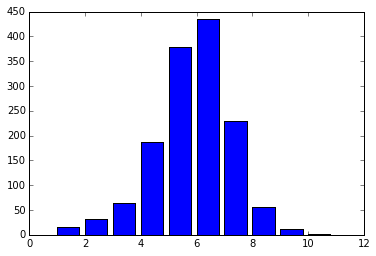

In [53]:
bar(wh[:,0],wh[:,1])

In [54]:
whq = np.array(wsq.histogram)

<Container object of 11 artists>

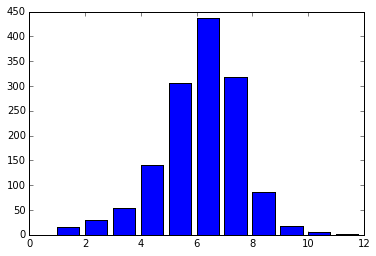

In [55]:
bar(whq[:,0],whq[:,1])

## Distance Based Weights

In [56]:
x,y = np.indices((5,5))

In [57]:
x.shape = (25,1)
y.shape = (25,1)
data = np.hstack([x,y])

In [58]:
data

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 0],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4]])

### knn weights

In [59]:
wknn3 = ps.knnW(data, k = 3)

In [60]:
wknn3[0]

{1: 1.0, 5: 1.0, 6: 1.0}

In [61]:
wknn3.histogram

[(3, 25)]

### Distance Bands

In [62]:
wdb = ps.threshold_binaryW_from_array(data,2)

In [63]:
wdb[0]

{1: 1, 2: 1, 5: 1, 6: 1, 10: 1}

In [64]:
wdb.histogram

[(5, 4), (6, 0), (7, 8), (8, 4), (9, 0), (10, 4), (11, 4), (12, 1)]

In [65]:
wdb.cardinalities

{0: 5,
 1: 7,
 2: 8,
 3: 7,
 4: 5,
 5: 7,
 6: 10,
 7: 11,
 8: 10,
 9: 7,
 10: 8,
 11: 11,
 12: 12,
 13: 11,
 14: 8,
 15: 7,
 16: 10,
 17: 11,
 18: 10,
 19: 7,
 20: 5,
 21: 7,
 22: 8,
 23: 7,
 24: 5}

## Writing to external files

In [68]:
w = ps.rook_from_shapefile('data/NAT.shp')

In [69]:
w.n

3085

In [70]:
gal = ps.open('data/nat_copy.gal', 'w')

In [71]:
gal.write(w)

In [72]:
gal.close()

In [73]:
gal = ps.open('data/nat_copy.gal', 'r')

In [74]:
w1 = gal.read()

In [75]:
w1.n

3085

In [76]:
w.pct_nonzero == w1.pct_nonzero

True